<ipython-input-8-ce05f89f57c5>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_data = train_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Accuracy: 0.9778


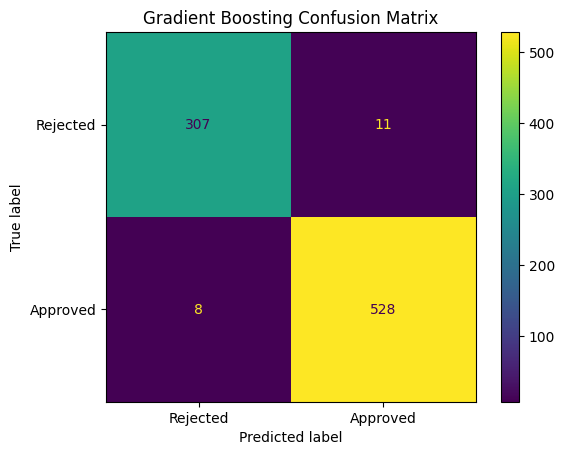

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

# Load the dataset
train_data = pd.read_csv('/content/loan_approval_dataset.csv')

# Strip leading/trailing spaces from column names and string values
train_data.columns = train_data.columns.str.strip()
train_data = train_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Drop rows where loan_status is missing
train_data = train_data.dropna(subset=['loan_status'])

# Encode target variable
y = train_data['loan_status'].map({'Approved': 1, 'Rejected': 0})

# Drop identifier and target column
X = train_data.drop(['loan_id', 'loan_status'], axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
disp.plot()
plt.title('Gradient Boosting Confusion Matrix')
plt.savefig('boosting_cm.png')
plt.show()
